# Series and views
* There are two hidden but powerful parts of Pandas `DataFrame`s
* Series is the type of one column from a `DataFrame`
   * enables column operations 
   * acts like a `numpy` `ndarray`. 
* Views are subsets of the original `DataFrame` where editing them changes the original. 
   * a new syntax creates views. 
   * This is the easiest way to edit a `DataFrame`

# The hidden type: Series

When we act on columns in a `DataFrame`, they are actually of type `Series`. 
* `Series` acts a lot like an `ndarray`.
* most `ndarray` functions supported. 
* default index is integer offset. 

But `Series` is -- in fact -- much more expressive than `ndarray`
* Can index by non-numeric data, i.e., one can "label" rows. 
* Can optimize operations by careful choices in indexing. 

Consider:

In [1]:
import pandas as pd
d1 = pd.DataFrame({ 'a': [1,2,3], 'b': [4,5,6], 'c': [7,8,9]})
d1

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9


In [2]:
d1['a']  # one column

0    1
1    2
2    3
Name: a, dtype: int64

In [3]:
type(d1['a'])  # it's a Series

pandas.core.series.Series

In [4]:
d1['a'][1]  # [column][row]

2

In [5]:
d1['a'].sum()  # all rows 

6

In [6]:
d1['b'].mean()  # all rows 

5.0

# A few caveats
1. A series via the syntax `df[column]` is a copy. Changing it doesn't change the original. If you try it, you'll get an interesting warning:

In [7]:
d1['b'][1] = 20

This didn't change `d1` at all: 

In [8]:
d1

,a,b,c
0,1,4,7
1,2,20,8
2,3,6,9


# Indexes
An index is a set of labels for rows. The default index is 0-n integers. Indexes can be anything. Let's use letters. 

In [9]:
d1['labels'] = ['d', 'e', 'f']
d1

,a,b,c,labels
0,1,4,7,d
1,2,20,8,e
2,3,6,9,f


In [10]:
d2 = d1.set_index('labels')
d2

,a,b,c
labels,,,
d,1,4,7
e,2,20,8
f,3,6,9


In [11]:
d2['a']

labels
d    1
e    2
f    3
Name: a, dtype: int64

# Whoa there! What just happened?
* Labeling a `DataFrame` usually creates a new `DataFrame`.
* Series also support row labels. 
* Changing the labels on a `DataFrame` changes the labels on all Series. 

We can access by column and row, as before: 

In [12]:
d2['a']['e']

2

but the following less intuitive syntax is recommended for performance reasons. 
* `:'e'` a *row range:* labels up to and including 'e'
* `'b':`  a *column range:* labels from 'b' upward. 
* `:` by itself denotes all.

In [13]:
d2.loc[:'e','b':]  # create a view of d2

,b,c
labels,,
d,4,7
e,20,8


# Not particularly intuitive, but very powerful. 
* The addressing form `.loc[]` above has significant powers. 
* Consider

In [14]:
d2.loc[:'e', 'b':] = 42
d2

,a,b,c
labels,,,
d,1,42,42
e,2,42,42
f,3,6,9


The assignment set multiple cells to a value. 
This is a special case of a more general property. 

# Copies and views

In dealing with Pandas, there are two kinds of derived data: 
* *Copies* are decoupled from the original data. 
* *Views* retain their coupling with the original data. 

The meaning of the word *view* is consistent with its use in databases. 

The key issue is again *mutability*. 
* Changing a view changes the original data. 
* Changing a copy does not. 

The curious notation `df.loc[rows, columns]` creates a *view*. 
* Not separate from the original `DataFrame`. 
* Changing it changes the original `DataFrame`! 

The more typical notation `df[columns][rows]` creates a *copy*. 
* The copy is independent of the original. 
* Changing it doesn't change the original data. 
* The first bracket does the copy. 
* This avoids confusion when using row expressions. 

Consider, e.g., 

In [15]:
v1 = d2.loc['e':,'b':]  # a view
v1



,b,c
labels,,
e,42,42
f,6,9


In [16]:
v1.loc['e','b']=100
v1

,b,c
labels,,
e,100,42
f,6,9


In [17]:
d2

,a,b,c
labels,,,
d,1,42,42
e,2,100,42
f,3,6,9


# Whoa there! What happened?
The view `v1` was an alias for a subset of `d2`, and changing `v1` changed `d2`. 

# Views can be partial

In [18]:
v1['foo'] = True  # a new column, not part of the view
v1

,b,c,foo
labels,,,
e,100,42,True
f,6,9,True


In [19]:
v1.loc['e', 'c'] = 200
v1


,b,c,foo
labels,,,
e,100,200,True
f,6,9,True


In [20]:
d2

,a,b,c
labels,,,
d,1,42,42
e,2,100,200
f,3,6,9


# Copies are decoupled
Consider: 

In [21]:
c1 = d2[['b', 'c']][:'e']  # copied 
c1

,b,c
labels,,
d,42,42
e,100,200


In [22]:
c1.loc['e', 'b'] = 300  # technically a view of a copy(!)
c1  # gets changed

,b,c
labels,,
d,42,42
e,300,200


In [23]:
d2  # doesn't reflect change of copy. 

,a,b,c
labels,,,
d,1,42,42
e,2,100,200
f,3,6,9


# Why is this so weird? 
* Pandas is an evolving language. 
* The copy syntax (e.g., df[columns][rows]) evolved first, to enable column operations. 
* The view syntax (e.g. df.loc[columns, rows]) evolved last, to enable setting cells easily (and for efficiency). 
* People were already using the copy syntax widely, and Pandas couldn't change that without breaking users' code. 
* So Pandas instituted a new, separate syntax for the different use case. 

# Labels on series
* Series can be labeled as well. 
* They inherit their labels from the `DataFrame`. 
* All series have exactly the same row labels for each row. 
* Some of the `Series` queries look like `DataFrame` queries. 

Consider

In [24]:
s1 = d1['b']
s1

0     4
1    20
2     6
Name: b, dtype: int64

# Let's put this into practice
First, let's register you for grading. 

In [25]:
# Don't change this cell; just run it. 
from client.api.notebook import Notebook
ok = Notebook('Series and views.ok')
ok.auth(inline=True)

Assignment: Series and views
OK, version v1.14.15

Successfully logged in as alva.couch@gmail.com


In [26]:
df = pd.DataFrame({'name': ['Garfield', 'Bill', 'Snoopy', 'Dogbert'],
                   'kind': ['cat', 'cat', 'dog', 'dog'],
                   'weight': [20, 10, 15, 10],
                   'food': ['lasagna', 'roadkill', 'canned', 'pate']})
df

,name,kind,weight,food
0,Garfield,cat,20,lasagna
1,Bill,cat,10,roadkill
2,Snoopy,dog,15,canned
3,Dogbert,dog,10,pate


1. Create a new `DataFrame` `pets` from `df` that is indexed by name. 

In [27]:
# your answer: 
pets = df.set_index(df.name)
print(pets)

              name kind  weight      food
name                                     
Garfield  Garfield  cat      20   lasagna
Bill          Bill  cat      10  roadkill
Snoopy      Snoopy  dog      15    canned
Dogbert    Dogbert  dog      10      pate


In [28]:
_ = ok.grade('q01')  # run this to check your work. 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



2. In `pets`, set 'Snoopy's weight to 16. 

In [29]:
# Your answer:
pets.loc['Snoopy', 'weight'] = 16
print(pets)

              name kind  weight      food
name                                     
Garfield  Garfield  cat      20   lasagna
Bill          Bill  cat      10  roadkill
Snoopy      Snoopy  dog      16    canned
Dogbert    Dogbert  dog      10      pate


In [30]:
_ = ok.grade('q02')  # run this to check your work. 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



3. Create a copy `dogs` that consists of just the dogs in `pets`.

In [31]:
# Your answer: 
dogs = pets.loc[pets.kind == 'dog']
print(dogs)

            name kind  weight    food
name                                 
Snoopy    Snoopy  dog      16  canned
Dogbert  Dogbert  dog      10    pate


In [32]:
_ = ok.grade('q03')  # run this to check your work. 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



4. In `dogs`, set Dogbert's weight to 25. This will print a warning. 

In [33]:
# Your answer: 
dogs.loc['Dogbert','weight'] = 25
print(dogs)

            name kind  weight    food
name                                 
Snoopy    Snoopy  dog      16  canned
Dogbert  Dogbert  dog      25    pate


C:\Users\couch\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [34]:
_ = ok.grade('q04')  # run this to check your work. 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



In [35]:
pets  # what happened to the original?

,name,kind,weight,food
name,,,,
Garfield,Garfield,cat,20,lasagna
Bill,Bill,cat,10,roadkill
Snoopy,Snoopy,dog,16,canned
Dogbert,Dogbert,dog,10,pate


5. Create a Series `weights` of `dogs` with just the weights.

In [36]:
weights = dogs.loc[:,'weight']
print(weights)

name
Snoopy     16
Dogbert    25
Name: weight, dtype: int64


In [37]:
_ = ok.grade('q05')  # run this to check your work. 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



6. Change Dogbert's weight to 35 in the copy `weights`. This will print a warning. 

In [38]:
# Your answer: 
weights['Dogbert'] = 35
print(weights)

C:\Users\couch\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


name
Snoopy     16
Dogbert    35
Name: weight, dtype: int64


C:\Users\couch\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2961: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [39]:
_ = ok.grade('q06')  # run this to check your work. 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



In [40]:
dogs  # Did you change the copy? 

,name,kind,weight,food
name,,,,
Snoopy,Snoopy,dog,16,canned
Dogbert,Dogbert,dog,35,pate


(Ed.s note: This is amusing. It both warns me that it won't change the original and then changes it. If the type of this object were `DataFrame`, the warning would be reasonable, but the `weights` object is type `Series`, so the warning is moot.)

In [41]:
pets  # check that you didn't change the top-level original

,name,kind,weight,food
name,,,,
Garfield,Garfield,cat,20,lasagna
Bill,Bill,cat,10,roadkill
Snoopy,Snoopy,dog,16,canned
Dogbert,Dogbert,dog,10,pate


7. **Challenge problem:** (optional) Create a version of `dogs` that is a *view* and demonstrate that it is a view by making a change in the view that is reflected in `pets`. I have been unable to do this! I wonder if it's possible!

In [42]:
# Your answer: 
dogs = ...
dogs

Ellipsis

Now we are introducing a new dataset which is the countries.csv which we will use to get latitude and longitude data.

Make sure to inspect your data frame that reads from this new dataset makes sure it is correct. You may notice something weird going on here with "\t" appearing places. Try googling what "\t" in computer programming is if you are not aware, and see if you need to do anything different to fix it.

How are you going to handle imperfect merging between the datasets?

One of the TA's with no knowledge what so ever about life happiness randomly proposes that the Happiness score could instead be calculated as:

\\(( \text{LogGDP} + \text{HealthyLifeExpectancyAtBirth}^2 \\))

Make this change and replace the old Happiness score with this new measure

Our countries.csv is attributed at: https://developers.google.com/public-data/docs/canonical/countries_csv

under creative commons 4: https://creativecommons.org/licenses/by/4.0/

In [1]:
x = 3
x

3

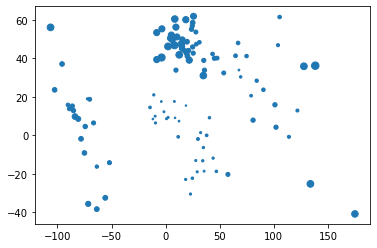

In [67]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

def plot_bubbles(lattitude, longitude, happy): # expect pandas objects
    plt.scatter(lattitude, longitude, s=np.exp(happy/1000)/5)
    plt.show()






df_country = pd.read_csv("countries.csv", delimiter='\t')
df_happy = pd.read_csv("happiness-report.csv")

df_happy = df_happy.dropna()

df_happy['name'] = df_happy['Country']
df_happy.loc[:, 'HappinessScore'] = df_happy["LogGDP"] + df_happy["HealthyLifeExpectancyAtBirth"]**2

df = pd.merge(left=df_country, right=df_happy, how='inner', on='name')

y_pos = df["latitude"]
x_pos = df["longitude"]

sizes = df["HappinessScore"]


plot_bubbles(x_pos, y_pos, sizes)







Given a new country British Virgin Islands, we do not have happiness data on but there is data in the countries.csv for longitude and lattidude for it, can we give it a happiness using the average of the 5 closest countries.

We measure the distance between 2 countries by:
\\(( \sqrt{\text{difference in lattitudes}^2 + \text{difference in longitudes}} \\))

Another caveat you might notice is that even when we select for a single value in a cell of your dataframe you do not get the exact value but a pandas (1x1) object, so for broadcasting you will have issues so it is not treated as a scalar. To get the exact scalar value we can use the to_numpy() function to get our 1x1 pandas to a numpy array of size 1 to retrieve our value.

Example: 

x = df.DataFrame({"hello": [1]})

y = x["hello"]

z = y.to_numpy()[0]

Hint: create a new column to store distance calculation and google if you can sort the dataframe somehow using our new column

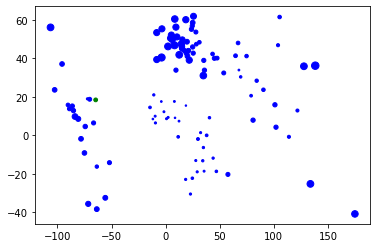

In [81]:
def plot_with_new_data(old_longitude, old_lattitude, old_happiness, virgin_longitude, virgin_lattitude, virgin_happy):
    new_happiness = old_happiness.to_numpy().flatten()
    new_happiness = np.hstack([new_happiness, [virgin_happy]])

    new_lattitude = old_lattitude.to_numpy().flatten()
    new_lattitude = np.hstack([new_lattitude, [virgin_lattitude]])
    
    new_longitude = old_longitude.to_numpy().flatten()
    new_longitude = np.hstack([new_longitude, [virgin_longitude]])

    c = np.repeat(['b'], old_longitude.to_numpy().shape[0]+1)
    c[-1] = 'g'



    plt.scatter(new_longitude, new_lattitude, s=np.exp(new_size/1000)/5, c=c)
    plt.show()


new_country = "British Virgin Islands"

x = df_country[df_country.name == new_country]

lat = df_country[df_country.name == new_country]["latitude"].to_numpy()[0]
long = df_country[df_country.name == new_country]["longitude"].to_numpy()[0]

df["distance"] = (df["latitude"]-lat)**2 + (df["longitude"]-long)**2
df = df.sort_values('distance', ascending=True)

new_happy = df["HappinessScore"][:5].mean()

plot_with_new_data(x_pos, y_pos, sizes, long, lat, new_happy)








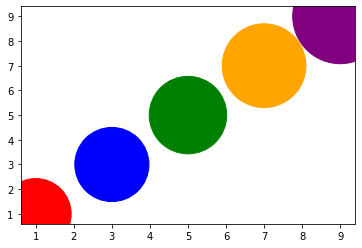

In [5]:
# we want to create a new happiness equations

# given 2 dataset
# 1) happiness dataset
# 2) country-continent dataset, also location

# merge them
# mutate happiness scores with calculated scores
# feed the new dataframe into our amazing function to display the scores

# part 2: can we use the information of nearby countries to decide the score of the current county
# create a serise, then using a view of that serise find the minimum(distance) to our country then remove it... etc.
# average of 3 nearest bubble locations    

x_pos = [1, 3, 5, 7, 9]
y_pos = [1, 3, 5, 7, 9]
sizes = [5000, 5500, 6000, 7000, 9000]
colors = ['red', 'blue', 'green', 'orange', 'purple']

import matplotlib.pyplot as plt

plt.scatter(x_pos, y_pos, s=sizes, c=colors)


# When you are done with this workbook, 
* Save and checkpoint it. 
* Change `ready` to `True` in the cells below. 
* Run both cells to submit. 

In [43]:
# Don't change this cell; just run it. 
from client.api.notebook import Notebook
ok = Notebook('Series and views.ok')
ok.auth(inline=True)

Assignment: Series and views
OK, version v1.14.15

Successfully logged in as alva.couch@gmail.com


In [45]:
ready = False  # change to True when ready to submit
if not ready: 
    raise Exception("change ready to True when ready to submit")
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'Series and views.ipynb'.
Submit... 100% complete
Submission successful for user: alva.couch@gmail.com
URL: https://okpy.org/cal/COMP205/su19/seriesandviews/submissions/L7wQ1p

